This notebook looks at the power iteration component.

In [1]:
import numpy as np

In [2]:
from src.var_processor.pb_threshold import get_rand_ints, pb_threshold

In [3]:
ev = np.ones(shape=(3, 1))
ev = ev / ev.sum()
print(ev)

[[0.33333333]
 [0.33333333]
 [0.33333333]]


In [4]:
ev = get_rand_ints(8, (3,1))
ev = ev / ev.sum()
print(ev)

[[0.09375   ]
 [0.45404412]
 [0.45220588]]


In [6]:
from src.var_processor.covariance import Covariance_Unit

size = (3, 3)
length = size[0]*size[1]

cu = Covariance_Unit(length)

for i in range(0, 10000):
    # get a 3x3 grid of random 8-bit integers
    rand_ints = get_rand_ints(8, size).astype(np.uint8)
    thresholded = pb_threshold(rand_ints)
    flattened = thresholded.reshape(length, 1)
    cu.update(flattened)
    
print(cu.covariance)

In [30]:
class Power_Iterator:
    """Module to determine an eigenvector using power iteration."""
    
    def __init__(self, length):
        """Initialise.
        
        Args:
            length: integer setting the 1D size of the eigenvector."""
        # Initialise eigenvector as random vector
        self.ev = get_rand_ints(8, (length, 1))
        # Scale to have unit length (it might be easier to have integer values?)
        self.ev = self.ev / np.linalg.norm(self.ev)
        # Define placeholder for covariance matrix
        self.cov = np.zeros(shape=(length, length))
    
    def iterate(self, power=1):
        """One pass of iteration."""
        self.ev = np.matmul(np.power(self.cov, power), self.ev)
        # Scale to have unit length (it might be easier to have integer values?)
        self.ev = self.ev / np.linalg.norm(self.ev)
    
    def get_eigenvector(self):
        """Returns the top eigenvector."""
        return self.ev
    
    def get_eigenvalue(self):
        """Returns associated eigenvalue."""
        top_1 = np.matmul(self.ev.T, self.cov)
        bottom = np.matmul(self.ev.T, self.ev)
        r = np.matmul(top_1, self.ev) / bottom
        return r
    
    def load_covariance(self, cov):
        """Updates the covariance matrix."""
        self.cov = cov
        # Put here an update of an existing matrix?

Let's test it out.

Need to watch out of the case when ev = 0 as we get a divide by 0.

In [31]:
pi = Power_Iterator(9)

In [32]:
pi.load_covariance(cu.covariance)

In [33]:
pi.ev.shape

(9, 1)

In [43]:
print(pi.ev)
for i in range(0, 10000):
    #print(pi.ev)
    pi.iterate()
print(pi.ev)

[[ 0.10480957]
 [ 0.18317882]
 [ 0.19022592]
 [ 0.10696322]
 [ 0.18246145]
 [ 0.09948156]
 [ 0.06490748]
 [-0.13200835]
 [ 0.19998033]]
[[ 0.10480957]
 [ 0.18317882]
 [ 0.19022592]
 [ 0.10696322]
 [ 0.18246145]
 [ 0.09948156]
 [ 0.06490748]
 [-0.13200835]
 [ 0.19998033]]


In [20]:
pi.ev.shape

(9, 9)

In [38]:
e,EV = np.linalg.eigh(cu.covariance)

In [45]:
print(EV[:, -1]/-2)

[ 0.11807353  0.20636065  0.21429958  0.12049974  0.20555249  0.11207125
  0.07312171 -0.1487144   0.22528843]


In [50]:
# Looking at Rayleigh Quotient
ev = get_rand_ints(8, (9,1))
ev = ev / ev.sum()
print(ev)
r = np.matmul(np.matmul(ev.T,cu.covariance), ev)/np.matmul(ev.T,ev)
print(r)

[[0.00657895]
 [0.16823308]
 [0.02067669]
 [0.01973684]
 [0.1268797 ]
 [0.23966165]
 [0.15789474]
 [0.21616541]
 [0.04417293]]
[[0.25129094]]


How do you use a scalar value to iterate?!

Ah - this is actually the eigenvalue.

## Inverse Power with Shift & Rayleigh Quotient

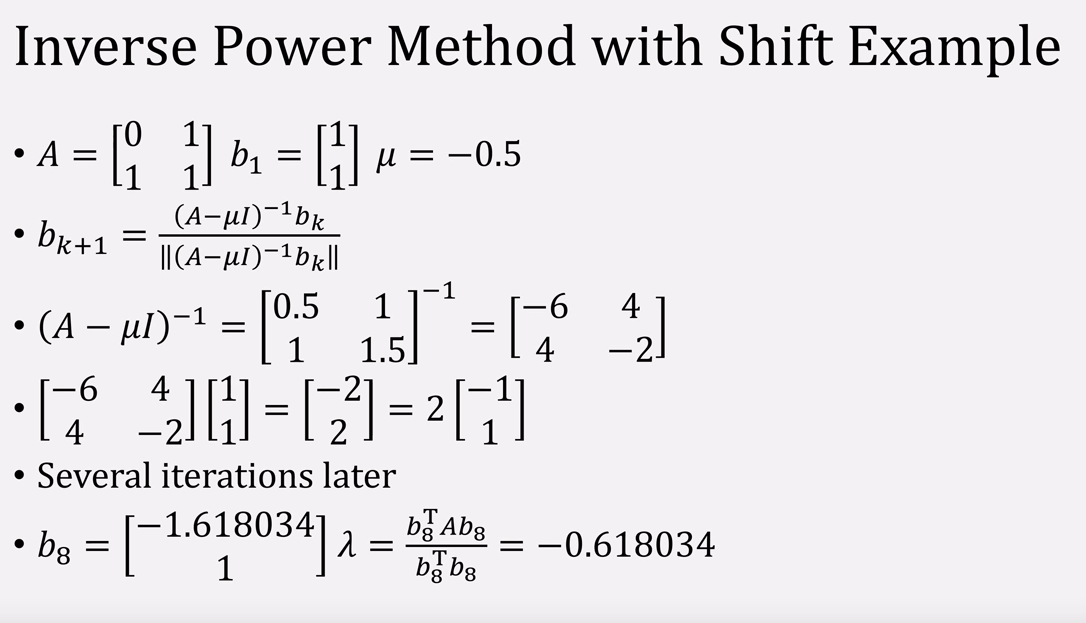